In [1]:
# pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats.contingency import association
import numpy as np
from statsmodels.stats.proportion import proportions_ztest



%matplotlib inline

<h2> Data Frames


Data Frames: 

df_final_demo: Client Profiles
df_final_experiement_clients = Experiment Roster (clients who participated on experiment)

df_pt1 and df_pt2 : web data initial files raw
df_final_web_data: concat df_pt1,df_pt2 web data

df_final_demo : Client Profiles
client_information_experiment = merge of df_final_demo and  df_final_experiement_clients (information of clients, participated or not in the experiment)

web_data_summary: no_of_visits, is_confirmed, duration, had_error, error_count no_of_confirms
web_data_summary_experiment = merge of web_data_summary and df_final_experiement_clients (web data summary and participation or not in the experiment)

In [3]:
# Data Frames: 

# df_final_demo: Client Profiles
# df_final_experiement_clients = Experiment Roster (clients who participated on experiment)

# df_pt1 and df_pt2 : web data initial files raw
# df_final_web_data: concat df_pt1,df_pt2 web data

# df_final_demo : Client Profiles
# client_information_experiment = merge of df_final_demo and  df_final_experiement_clients (information of clients, participated or not in the experiment)

# web_data_summary: no_of_visits, is_confirmed, duration, had_error, error_count no_of_confirms
# web_data_summary_experiment = merge of web_data_summary and df_final_experiement_clients (web data summary and participation or not in the experiment)


#Andys version
df_final_demo = pd.read_csv('df_final_demo.txt')
df_pt1 = pd.read_csv('df_final_web_data_pt_1.txt', parse_dates=['date_time'])
df_pt2 = pd.read_csv('df_final_web_data_pt_2.txt', parse_dates=['date_time'])
df_final_experiement_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data = pd.concat([df_pt1,df_pt2])

#old version
# cp = pd.read_csv("df_final_demo.txt")
# dfp1 = pd.read_csv("df_final_web_data_pt_1.txt")
# df_pt2 = pd.read_csv("df_final_web_data_pt_2.txt")
#dfp = concat of dfp1 and dfp2
#dfp_c = concat of dfp1 and dfp2 without duplicates

# exc = pd.read_csv("df_final_experiment_clients.txt")




<h2> EDA & Data Cleaning


In [4]:
# Cleaning up of the datasets cp and exc

def clean_exc(data1, data2):
     #check if null values in client_id column
    print(f"null values in client_id column: {data1['client_id'].isnull().sum()}")
    # check if any Variation is missing
    print(f"null values in variant column: {data1['Variation'].isnull().sum()}")
    
    data1.rename(columns={'Variation':'variation'}, inplace=True)
    print("column name Variant changed to lower_case")
    exc_c = data1.dropna()
    print("Null values dropped for exc dataset")
    
    #check if null values in cp dataset
    print(f"null values in client_id column: {data2.isnull().sum()}")
    cp_c = data2.dropna()
    print("Null values dropped for cp dataset")
    
    
    return exc_c, cp_c



data1 = df_final_experiement_clients
data2 = df_final_demo
df_final_experiement_clients, df_final_demo = clean_exc(data1, data2)
    
print("Cleaned exc dataset shape:", df_final_experiement_clients.shape)
print("Cleaned cp dataset shape:", df_final_demo.shape)

null values in client_id column: 0
null values in variant column: 20109
column name Variant changed to lower_case
Null values dropped for exc dataset
null values in client_id column: client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
Null values dropped for cp dataset
Cleaned exc dataset shape: (50500, 2)
Cleaned cp dataset shape: (70594, 9)


In [5]:
data = {'Client Profiles Data': df_final_demo, 'Digital Footprints Data': df_final_web_data, 'Experiment Roster': df_final_experiement_clients}

def print_exploratory(data):
        '''Defines a fonction that prints exploratory of one or more data frames
    Take as paramaters 1 dictionary having as value: name data frames; key: data frame '''
        if not isinstance(data, dict):
            print("The data must be a dictionary")
        else: 
            print("Data shape: \n")
            for name, d in data.items():
                num_rows, num_columns = d.shape
                print(f'Shape of "{name}" : {num_columns} columns, {num_rows} rows')
            print("\n Duplicates:\n")
            for name, d in data.items():
                num_duplicates = d.duplicated().sum()
                print(f'Number of duplicates in "{name}" : {num_duplicates} duplicates')
            print("\n")
            for name, d in data.items():    
                unique_v = d.nunique()
                print(f'Unique Values "{name}": \n  {unique_v}\n ')
            for name, d in data.items():    
                typ = d.dtypes
                print(f'Data Type "{name}": \n  {typ}\n ')

print_exploratory(data)

Data shape: 

Shape of "Client Profiles Data" : 9 columns, 70594 rows
Shape of "Digital Footprints Data" : 5 columns, 755405 rows
Shape of "Experiment Roster" : 2 columns, 50500 rows

 Duplicates:

Number of duplicates in "Client Profiles Data" : 0 duplicates


Number of duplicates in "Digital Footprints Data" : 10764 duplicates
Number of duplicates in "Experiment Roster" : 0 duplicates


Unique Values "Client Profiles Data": 
  client_id           70594
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70327
calls_6_mnth            8
logons_6_mnth           9
dtype: int64
 
Unique Values "Digital Footprints Data": 
  client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64
 
Unique Values "Experiment Roster": 
  client_id    50500
variation        2
dtype: int64
 
Data Type "Client Profiles Data": 
  client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object
 
Data Type 

In [6]:
def print_h(data):
    for name, d in data.items():    
        print(d.head(5))
    
print_h(data)

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_773262

In [7]:
# web_data_summary

# target df:

# client_id - id of client
# confirmed - has reached the confirmed step
# avg_step_duration - average time spent on each step
# error_count - number of teams they went back to a previous step
# had_error - use went back a step at least 1 time
# no_of_visits
# no_of_confirmed

In [8]:
clients_who_confirmed = df_final_web_data[df_final_web_data['process_step']=='confirm']
clients_who_confirmed = clients_who_confirmed.drop_duplicates(subset='client_id')

In [9]:
df_final_web_data = df_final_web_data.drop_duplicates()
df_final_web_data = df_final_web_data.sort_values(by=['visit_id','date_time'])
df_final_web_data = df_final_web_data.reset_index(drop=True)
df_final_web_data['next_date_time'] = (df_final_web_data.sort_values(by='date_time').groupby('visit_id')['date_time'].shift(-1))
df_final_web_data['duration'] = df_final_web_data['next_date_time'] - df_final_web_data['date_time']

In [10]:
df_avg_step_durations = df_final_web_data.groupby(by='client_id')[['duration']].mean()

In [11]:
# how are we going to define an error 
# - is hitting the same page twice an error
# - is it only an error if you go back a step?
# - is it only an error if you go back a step within the same visit?

# lets review the "documentation"
# Error Rates: If there’s a step where users go back to a previous step,
# it may indicate confusion or an error. You should consider moving from 
# a later step to an earlier one as an error

In [12]:
df_final_web_data = df_final_web_data.sort_values(['client_id','date_time'])
process_map = {'start':0, 'step_1':1, 'step_2':2, 'step_3':3, 'confirm':4}
df_final_web_data['process_step_id'] = df_final_web_data['process_step'].map(process_map)
df_final_web_data['previous_process_step_id'] = (df_final_web_data.sort_values(by=['client_id','date_time']).groupby('client_id')['process_step_id'].shift(1))
df_final_web_data['is_error'] = df_final_web_data['process_step_id'] < df_final_web_data['previous_process_step_id']
df_final_web_data[df_final_web_data['client_id'].isin(df_final_web_data['client_id'].sample(5))][['client_id','date_time','process_step_id','previous_process_step_id','is_error']]
df_client_error = df_final_web_data[df_final_web_data['is_error']==True].groupby('client_id')['is_error'].agg([max,len])

C:\Users\rober\AppData\Local\Temp\ipykernel_14696\2779264885.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_client_error = df_final_web_data[df_final_web_data['is_error']==True].groupby('client_id')['is_error'].agg([max,len])


In [13]:
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time,next_date_time,duration,process_step_id,previous_process_step_id,is_error
537387,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,0 days 00:00:09,0,NaN,False
537388,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,0 days 00:00:46,1,0.0,False
537389,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,0 days 00:01:34,2,1.0,False
537390,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,0 days 00:01:04,3,2.0,False
537391,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaT,NaT,4,3.0,False
...,...,...,...,...,...,...,...,...,...,...
687550,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01 22:41:28,0 days 00:01:20,1,0.0,False
687551,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01 22:41:47,0 days 00:00:19,1,1.0,False
687552,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01 22:44:58,0 days 00:03:11,2,1.0,False
687553,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01 22:48:39,0 days 00:03:41,3,2.0,False


In [14]:
number_steps = df_final_web_data.groupby('client_id')[['process_step']].nunique()
number_steps = number_steps.rename(columns={"client_id":"client_id", "process_step": "number_steps"})
number_steps = number_steps.reset_index()

In [15]:
df_client_visits = df_final_web_data.groupby('client_id')[['visit_id']].nunique()

In [16]:
df_client_confirms = df_final_web_data[['client_id','process_step']][df_final_web_data['process_step']=='confirm'].groupby('client_id').count()
df_client_confirms.columns = ['no_of_confirms']

In [17]:
clients_who_confirmed['is_confirmed'] = 1
clients_who_confirmed = clients_who_confirmed[['client_id', 'is_confirmed']]
df_avg_step_durations = df_avg_step_durations.reset_index()
df_client_error = df_client_error.reset_index()
df_client_error.columns=['client_id','had_error','error_count']
df_client_error
df_client_visits = df_client_visits.reset_index()
df_client_visits.columns=['client_id', 'no_of_visits']
df_client_confirms = df_client_confirms.reset_index()


In [18]:
dfs =[df_client_visits, clients_who_confirmed, df_avg_step_durations, df_client_error, df_client_confirms, number_steps]
dfs = [df.set_index('client_id') for df in dfs]

web_data_summary = dfs[0].join(dfs[1:])
web_data_summary

,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps
client_id,,,,,,,
169,1,1.0,0 days 00:00:53.250000,NaN,NaN,1.0,5
336,1,NaN,0 days 00:15:48,NaN,NaN,NaN,1
546,1,1.0,0 days 00:00:33.250000,NaN,NaN,1.0,5
555,1,1.0,0 days 00:00:39.500000,NaN,NaN,1.0,5
647,1,1.0,0 days 00:01:34.250000,NaN,NaN,1.0,5
...,...,...,...,...,...,...,...
9999729,3,1.0,0 days 00:01:07.500000,True,2.0,1.0,5
9999768,1,1.0,0 days 00:00:44.181818181,True,3.0,1.0,5
9999832,1,NaN,0 days 00:00:08,NaN,NaN,NaN,2


In [19]:
web_data_summary['had_error'] = web_data_summary['had_error'].fillna(False)
web_data_summary = web_data_summary.fillna(0)
web_data_summary['is_confirmed'] = web_data_summary['is_confirmed'].map({1:True, 0:False})
web_data_summary[['error_count','no_of_confirms']] = web_data_summary[['error_count','no_of_confirms']].astype(int)

In [20]:
web_data_summary["no_of_confirms"].unique()

array([ 1,  0,  3,  5,  2, 10,  6,  8,  4,  9,  7, 19, 12, 11, 17, 15, 14,
       20, 16, 13, 23])

In [21]:
web_data_summary

,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps
client_id,,,,,,,
169,1,True,0 days 00:00:53.250000,False,0,1,5
336,1,False,0 days 00:15:48,False,0,0,1
546,1,True,0 days 00:00:33.250000,False,0,1,5
555,1,True,0 days 00:00:39.500000,False,0,1,5
647,1,True,0 days 00:01:34.250000,False,0,1,5
...,...,...,...,...,...,...,...
9999729,3,True,0 days 00:01:07.500000,True,2,1,5
9999768,1,True,0 days 00:00:44.181818181,True,3,1,5
9999832,1,False,0 days 00:00:08,False,0,0,2


In [22]:
client_information_experiment = pd.merge(df_final_demo, df_final_experiement_clients, on='client_id', how='left')
client_information_experiment["variation"] = client_information_experiment["variation"].fillna("Unknown")


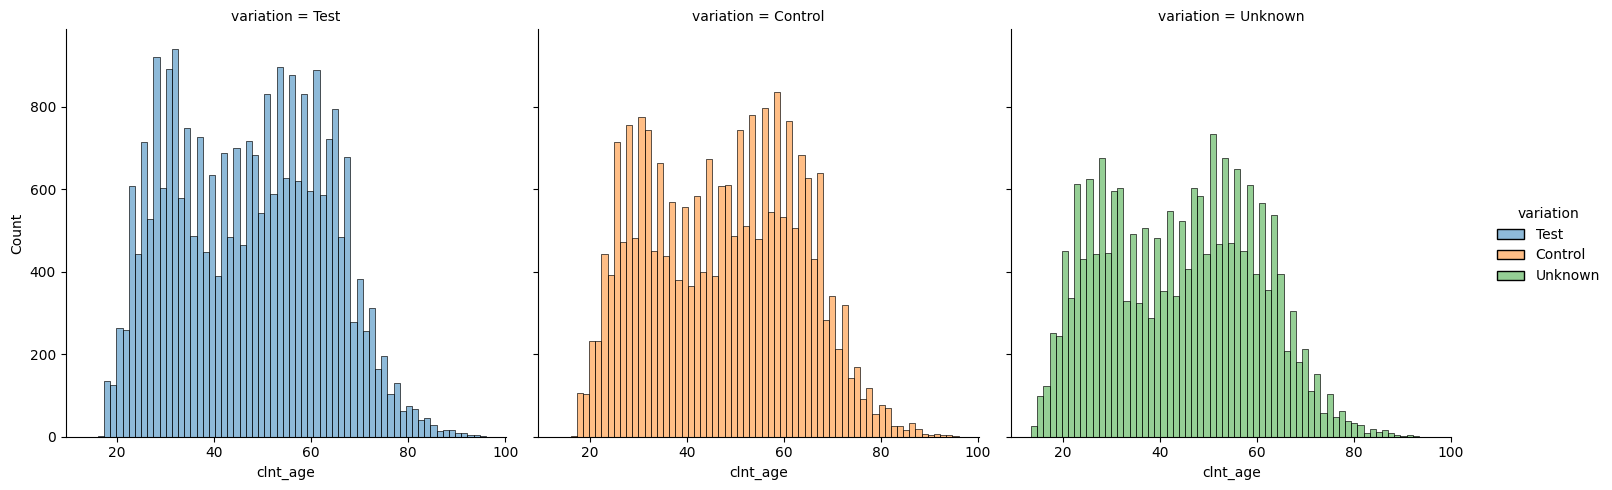

In [23]:
sns.displot(data=client_information_experiment, x="clnt_age",  hue="variation", col="variation")
plt.show()

In [24]:
client_information_experiment.shape

(70594, 10)

<h2> Redesign Outcome
New design’s performance compared to the old one,  based on the chosen KPIs

In [25]:
web_data_summary_experiment = pd.merge(web_data_summary, df_final_experiement_clients, on='client_id', how='outer')
web_data_summary_experiment["variation"] = web_data_summary_experiment["variation"].fillna("Unknown")
web_data_summary_experiment.tail(20)

,client_id,no_of_visits,is_confirmed,duration,had_error,error_count,no_of_confirms,number_steps,variation
120137,9998588,1,False,0 days 00:01:10.500000,False,0,0,2,Unknown
120138,9998750,1,False,0 days 00:00:13,False,0,0,2,Unknown
120139,9998773,1,True,0 days 00:01:13.750000,False,0,1,5,Test
120140,9998820,1,True,0 days 00:00:31,False,0,1,5,Unknown
120141,9998851,1,True,0 days 00:00:41.250000,False,0,1,5,Test
120142,9998921,1,False,0,False,0,0,1,Control
120143,9998964,2,True,0 days 00:01:05.666666666,False,0,1,5,Test
120144,9998980,1,True,0 days 00:00:37.500000,True,1,1,5,Unknown
120145,9999009,1,True,0 days 00:00:42.750000,False,0,1,5,Test
120146,9999150,1,False,0 days 00:00:09,True,1,0,2,Test


In [26]:
web_data_summary_experiment.describe()

,client_id,no_of_visits,error_count,no_of_confirms,number_steps
count,1.201570e+05,120157.000000,120157.000000,120157.000000,120157.000000
mean,5.013372e+06,1.324201,0.624017,0.853101,4.103981
std,2.881872e+06,0.741575,1.183999,0.909968,1.447308
min,1.690000e+02,1.000000,0.000000,0.000000,1.000000
25%,2.521851e+06,1.000000,0.000000,0.000000,4.000000
50%,5.020068e+06,1.000000,0.000000,1.000000,5.000000
75%,7.505650e+06,1.000000,1.000000,1.000000,5.000000
max,9.999875e+06,21.000000,30.000000,23.000000,5.000000


In [27]:
ab_test_groups = ["Test", "Control", "Unknown"]

def test_results(web_data_summary_experiment, variation):
    data_subset = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == variation]
    non_zero_confirm = data_subset.loc[data_subset["no_of_confirms"] != 0]["client_id"].count()
    had_error = data_subset.loc[data_subset["error_count"] != 0]["client_id"].count()
    total_count = data_subset["client_id"].count()
    avg_number_steps = data_subset["number_steps"].mean()
    error_rate = had_error/total_count
    completion_rate = non_zero_confirm/ total_count

    return completion_rate, error_rate, avg_number_steps
    

# Create an empty list to store dictionaries
result_data = []

# Fill the list with values
for variation in ab_test_groups:
    completion_rate_val, error_rate_val, avg_number_steps = test_results(web_data_summary_experiment, variation)
    result_data.append({"variation": variation, "completion rate": completion_rate_val, "error rate": error_rate_val, "number steps": avg_number_steps} )

# Create a DataFrame from the list of dictionaries
test_results = pd.DataFrame(result_data)
test_results

,variation,completion rate,error rate,number steps
0,Test,0.692932,0.378004,4.181697
1,Control,0.655873,0.343320,4.039393
2,Unknown,0.675079,0.346713,4.095712


In [28]:
web_data_summary_experiment["error_count"].mean()	

0.6240169112078364

In [29]:
web_data_summary_experiment['duration'] = pd.to_timedelta(web_data_summary_experiment['duration'])
web_data_summary_experiment_grouped = web_data_summary_experiment.groupby("variation").agg(
    client_id_count=('client_id', 'count'),
    avg_visits=('no_of_visits', 'mean'),
    total_visits=('no_of_visits', 'sum'),
    avg_duration=('duration', 'mean'),
    min_duration=('duration', 'min'),
    max_duration=('duration', 'max'),
    total_confirms=('no_of_confirms', 'sum'),
    avg_conf=('no_of_confirms', "mean"),
    avg_errors=('error_count', 'mean'),
    total_errors=('error_count', 'sum'),
)

web_data_summary_experiment_grouped.reset_index(inplace=True)
web_data_summary_experiment_grouped['avg_duration_m_s'] = web_data_summary_experiment_grouped['avg_duration'].apply(lambda x: f"{int(np.floor(x.total_seconds() / 60)):02d}:{int(round(x.total_seconds() % 60))}")
web_data_summary_experiment_grouped.insert(4, 'visits_percent', (web_data_summary_experiment_grouped['total_visits']/web_data_summary_experiment_grouped['total_visits'].sum()).round(2))
web_data_summary_experiment_grouped.insert(2, 'clients_percent', (web_data_summary_experiment_grouped['client_id_count']/web_data_summary_experiment_grouped['client_id_count'].sum()).round(2))
web_data_summary_experiment_grouped


,variation,client_id_count,clients_percent,avg_visits,total_visits,visits_percent,avg_duration,min_duration,max_duration,total_confirms,avg_conf,avg_errors,total_errors,avg_duration_m_s
0,Control,23532,0.20,1.370177,32243,0.20,0 days 00:01:11.694819541,0 days,0 days 01:03:35.833333333,17336,0.736699,0.565273,13302,01:12
1,Test,26968,0.22,1.379561,37204,0.23,0 days 00:01:13.568737177,0 days,0 days 01:05:53,25600,0.949273,0.707246,19073,01:14
2,Unknown,69657,0.58,1.287236,89665,0.56,0 days 00:01:13.309957197,0 days,0 days 01:18:13,59570,0.855190,0.611640,42605,01:13


In [30]:
web_data_summary_experiment_grouped

,variation,client_id_count,clients_percent,avg_visits,total_visits,visits_percent,avg_duration,min_duration,max_duration,total_confirms,avg_conf,avg_errors,total_errors,avg_duration_m_s
0,Control,23532,0.20,1.370177,32243,0.20,0 days 00:01:11.694819541,0 days,0 days 01:03:35.833333333,17336,0.736699,0.565273,13302,01:12
1,Test,26968,0.22,1.379561,37204,0.23,0 days 00:01:13.568737177,0 days,0 days 01:05:53,25600,0.949273,0.707246,19073,01:14
2,Unknown,69657,0.58,1.287236,89665,0.56,0 days 00:01:13.309957197,0 days,0 days 01:18:13,59570,0.855190,0.611640,42605,01:13


web_data_summary_experiment_grouped

In [31]:
duration_visit_test = web_data_summary_experiment_grouped[["variation","avg_duration_m_s"]]
test_results2 = pd.merge(test_results, duration_visit_test, how="outer",  on="variation")
test_results2


,variation,completion rate,error rate,number steps,avg_duration_m_s
0,Test,0.692932,0.378004,4.181697,01:14
1,Control,0.655873,0.343320,4.039393,01:12
2,Unknown,0.675079,0.346713,4.095712,01:13


<h2> Hypothesis Testing

1) Completion Rate using Ttest_ind

Null Hypothesis H0:
The new design (Test group) had a higher completion rate compared to the old design (Control group),  differences observed are not statistically significant
The 2 independent samples have identical average (expected) values


Alternative Hypothesis H1:
The new design (Test group) had a higher completion rate compared to the old design (Control group), and this difference is statistically significant

significance level, p-value, the statistical test prerequisites α = 0,05

In [32]:
def ind_testing(data1, data2):
    '''Define a fonction that calculates the T-test for the means of two independent samples of scores
     the null hypothesis that 2 independent samples have identical average (expected) values. 
     This fonction assumes that the populations have different variances by default
      Take as paramaters 2 Datas '''
    
    stat, pvalue = ttest_ind(data1, data2, axis=0, equal_var=False, alternative='two-sided')
    
    print(f"TtestResult statistic : {stat}")
    print(f"TtestResult pvalue: {pvalue}")
    if pvalue < 0.05:
        print("We reject the null hypothesis - There is a significant difference between groups.")
    else:
        print("Fail to reject the null hypothesis - There is no significant difference between groups.")
    return stat, pvalue

In [33]:
c_data = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["is_confirmed"]
t_data = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["is_confirmed"]
print(f"Size Group 'Clients Test Version':  {t_data .count()}")
print(f"Size Group 'Clients Control Version' {c_data .count()}")
print(f"Average Confirm'Clients Test Version' {t_data .mean().round(4)}")
print(f"Average Confirm 'Clients Control Version' {c_data .mean().round(4)}")

Size Group 'Clients Test Version':  26968
Size Group 'Clients Control Version' 23532
Average Confirm'Clients Test Version' 0.6929
Average Confirm 'Clients Control Version' 0.6559


In [34]:
ind_testing(c_data, t_data) #t-test

TtestResult statistic : -8.863468067325087
TtestResult pvalue: 8.009768670783661e-19
We reject the null hypothesis - There is a significant difference between groups.


(-8.863468067325087, 8.009768670783661e-19)

1) Completion Rate using Two Proportions Z-test

Two proportion z-test allows to compare two proportions to see if they are the same. 
Null Hupotthesis H0:
The null hypothesis for the test is that the proportions of clients who confirmed in the Vanguard 'test version' and the 'control version' are the same. 

Alternative Hypothesis H1
The alternate hypothesis (H1) for the test is that the proportions of clients who confirmed in the Vanguard 'test version' and the 'control version' are not the same

In [35]:
from statsmodels.stats.proportion import proportions_ztest

# Count of successes (True values) and total number of observations for Control group
c_success = c_data.sum()
c_total = len(c_data)

# Count of successes (True values) and total number of observations for Test group
t_success = t_data.sum()
t_total = len(t_data)


stat, p_value = proportions_ztest([c_success, t_success], [c_total, t_total])
print(f'Z-statistic: {stat}')
print(f'Z-test P-value: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis - There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between groups.")


Z-statistic: -8.8745141890702
Z-test P-value: 7.023933247581432e-19
Reject the null hypothesis - There is a significant difference between groups.


In [36]:
ttest_ind(c_data, t_data, axis=0, equal_var=False, alternative='two-sided')

# we reject the null hypothesis, The new design (Test group) 
# had a higher completion rate compared to the old design (Control group), and this difference is statistically significant


TtestResult(statistic=-8.863468067325087, pvalue=8.009768670783661e-19, df=49147.69981987177)

In [37]:
c_data.mean()

0.6558728539860615

In [38]:
t_data.mean()

0.6929323642835954

3) Other Hypothesis - Average Age

Null Hypothesis H0:
The average age of clients engaging with the new process is the same as those engaging with the old process (the samples are drawn from populations with the same population means)

Alternative Hypothesis H1:
The average age of clients engaging with the new process is not the same as those engaging with the old process (the samples are drawn from populations with different population means)


significance level, p-value, 
the statistical test prerequisites α = 0,05 confidence_interval(confidence_level=0.95)

In [39]:
client_information_experiment.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [40]:
client_information_experiment.shape

(70594, 10)

In [41]:
client_age_test = client_information_experiment.loc[client_information_experiment["variation"] == "Test"]["clnt_age"]
client_age_control= client_information_experiment.loc[client_information_experiment["variation"] == "Control"]["clnt_age"]

print(f"Size Group 'Clients Test Version':  {client_age_test.count()}")
print(f"Size Group 'Clients Control Version' {client_age_control.count()}")
print(f"Average Age'Clients Test Version' {client_age_test.mean().round(2)}")
print(f"Average Age 'Clients Control Version' {client_age_control.mean().round(2)}")

Size Group 'Clients Test Version':  26961
Size Group 'Clients Control Version' 23526
Average Age'Clients Test Version' 47.16
Average Age 'Clients Control Version' 47.5


In [42]:
ttest_ind(client_age_test, client_age_control, axis=0, equal_var=False, alternative='two-sided')



TtestResult(statistic=-2.416068061200627, pvalue=0.015692719461388675, df=49556.715189428134)

In [43]:
ind_testing(client_age_test, client_age_control)

TtestResult statistic : -2.416068061200627
TtestResult pvalue: 0.015692719461388675
We reject the null hypothesis - There is a significant difference between groups.


(-2.416068061200627, 0.015692719461388675)

We reject the Null Hypothesis that "The average age of clients engaging with the new process is the same as those engaging with the old process (the samples are drawn from populations with the same population means)

Nevertheless we can note that this averge difference is very small :

Average Age Clients Test Group 47.16
Average Age Clients Control Group 47.50

3) Other Hypothesis - Number of Errors
Null Hypothesis H0:
The number of errors among clients engaging with the new process is the same as those engaging with the old process (the samples are drawn from populations with the same population means)

Alternative Hypothesis H1:
The number of errors among clients engaging with the new process is  not the same as those engaging with the old process (the samples are not drawn from populations with the same population means)



significance level, p-value, 
the statistical test prerequisites α = 0,05 confidence_interval(confidence_level=0.95)

In [44]:
c_error = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["error_count"]
t_error = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["error_count"]
print(f"Size Group 'Clients Test Version':  {t_error .count()}")
print(f"Size Group 'Clients Control Version' {c_error .count()}")
print(f"Average Number of Errors 'Clients Test Version' {t_error .mean().round(4)}")
print(f"Average Number of Errors 'Clients Control Version' {c_error .mean().round(4)}")

Size Group 'Clients Test Version':  26968
Size Group 'Clients Control Version' 23532
Average Number of Errors 'Clients Test Version' 0.7072
Average Number of Errors 'Clients Control Version' 0.5653


In [45]:
ind_testing(c_error, t_error)

TtestResult statistic : -13.53643569183844
TtestResult pvalue: 1.1296262650940022e-41
We reject the null hypothesis - There is a significant difference between groups.


(-13.53643569183844, 1.1296262650940022e-41)

In [46]:
c_conf_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["no_of_confirms"]
t_conf_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["no_of_confirms"]
print(f"Size Group 'Clients Test Version':  {t_conf_number .count()}")
print(f"Size Group 'Clients Control Version' {c_conf_number .count()}")
print(f"Average Number of Confirms 'Clients Test Version' {t_conf_number .mean().round(4)}")
print(f"Average Number of Confirms 'Clients Control Version' {c_conf_number .mean().round(4)}")

ind_testing(c_conf_number, t_conf_number)

Size Group 'Clients Test Version':  26968
Size Group 'Clients Control Version' 23532
Average Number of Confirms 'Clients Test Version' 0.9493
Average Number of Confirms 'Clients Control Version' 0.7367
TtestResult statistic : -26.81138167225386
TtestResult pvalue: 3.6390794885284474e-157
We reject the null hypothesis - There is a significant difference between groups.


(-26.81138167225386, 3.6390794885284474e-157)

In [47]:
c_steps_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Control"]["number_steps"]
t_steps_number = web_data_summary_experiment.loc[web_data_summary_experiment["variation"] == "Test"]["number_steps"]
print(f"Size Group 'Clients Test Version':  {t_steps_number .count()}")
print(f"Size Group 'Clients Control Version' {c_steps_number .count()}")
print(f"Average Number of Steps 'Clients Test Version' {t_steps_number .mean().round(4)}")
print(f"Average Number of Steps 'Clients Control Version' {c_steps_number .mean().round(4)}")

ind_testing(c_steps_number, t_steps_number)

Size Group 'Clients Test Version':  26968
Size Group 'Clients Control Version' 23532
Average Number of Steps 'Clients Test Version' 4.1817
Average Number of Steps 'Clients Control Version' 4.0394
TtestResult statistic : -11.09475948070888
TtestResult pvalue: 1.4405840570768925e-28
We reject the null hypothesis - There is a significant difference between groups.


(-11.09475948070888, 1.4405840570768925e-28)

<h2>Preparing Data and Exporting it to use in "Tableau"

In [48]:
with pd.ExcelWriter('test_results.xlsx') as writer:  
    test_results2.to_excel(writer, sheet_name='test_results', engine='xlsxwriter')
    web_data_summary_experiment_grouped.to_excel(writer, sheet_name='test_resuts_extended', engine='xlsxwriter')




In [49]:
# web_data_summary_experiment.reset_index().to_excel('web_data_summary_experiment.xlsx', index=False)


In [50]:
# df_final_web_data.reset_index().to_excel('df_final_web_data.xlsx', index=False)

In [51]:
# client_information_experiment.reset_index().to_excel('client_information_experiment.xlsx', index=False)


In [58]:
web_data_experiment = df_final_web_data.merge(df_final_experiement_clients, on="client_id", how="left")
web_data_experiment.head()
web_data_experiment["variation"] = web_data_experiment["variation"].fillna("Unknown")
web_data_experiment["variation"].value_counts()

variation
Unknown    427406
Test       176699
Control    140536
Name: count, dtype: int64

In [59]:
# web_data_experiment.reset_index().to_excel('web_data_experiment.xlsx', index=False)

In [60]:
web_data_experiment.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_date_time,duration,process_step_id,previous_process_step_id,is_error,variation
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,0 days 00:00:09,0,NaN,False,Unknown
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,0 days 00:00:46,1,0.0,False,Unknown
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,0 days 00:01:34,2,1.0,False,Unknown
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,0 days 00:01:04,3,2.0,False,Unknown
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaT,NaT,4,3.0,False,Unknown
